This script demonstrates the line fitting using polynomial function

Name : So-Jeong An

Student ID : 2018120203

Github Link : https://github.com/SojeongAn/Assignment12

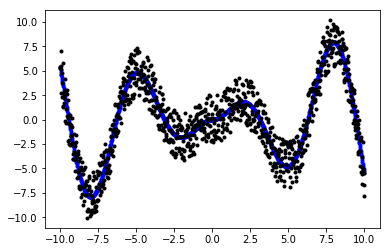

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

# Least square approximation

In [3]:
def computeApproximation(vecX,vecY):
    vecX = np.mat(vecX)
    vecY = np.mat(vecY).T
    xTx = vecX.T * vecX
    if(np.linalg.det(xTx) == 0.0): # if Singular function, return 
        print("This matrix is singular")
        return
    weight = xTx.I * (vecX.T * vecY) # weight
    return weight

# Compute the error:  $\sqrt{(vec1 - vec2)^2} $

In [110]:
def computeError(vec1, vec2):
    error = 0
    for i in range(0, len(vec2)):
        error += np.sqrt((float(vec1[i]) - float(vec2[i]))**2)
    print("MSE: ", error)        
    return np.sqrt(error)

# Add lambda

In [115]:
def addLambda(matrix, vec, lambda_):
    column = len(matrix.T)
    lamvec = np.ones((1,column), dtype=float)
    zerovec = [0]
    matrixA = np.concatenate((matrix, lambda_*lamvec), axis=0)
    matrixY = np.concatenate((vec, zerovec), axis=0)
    return matrixA, matrixY

# Make p

In [116]:
def makeSigma(num):
    mu, sigma = 0, 1 # mean and standard deviation
    r = np.random.normal(mu, sigma, num)
    return r

# Make A

In [144]:
def func(n , lambda_, p):
    dimensions = []; dimenX = []; var = []; weight = []; y = []; y_ = []
    for i in range(0, len(x)):
        dimenX = []
        for j in range(0, n+1):
            dimenX.append(x[i]**j)
        dimensions.append(dimenX)  # Set X0 = 1.0 for computing
    dimensions = np.mat(dimensions)
    matrixA, matrixY = addLambda(dimensions, y2, lambda_)
    weight = computeApproximation(matrixA, matrixY)
    print('weight:\n', weight)
    for j in range(0, n+1):
        var = []
        var = (x**j)*(float(weight[j]))
        y_.append(var)
    y_ = np.mat(y_)
    y_ = y_.T
    for i in range(0, len(y_)):
        sum_ = np.sum(y_[i])
        y.append(float(sum_))
    return y

# Training

In [148]:
def training(n, lambda_, p): # N: Dimension 
    error = []; y = []
    y = func(n, lambda_, p)
    error = computeError(y2, y)
    Ylabel = n,' dimension'
    visual(x, y, y2, lambda_)
    return error

# Visualization 

In [146]:
def visual(x, y, y2, lambda_):
    plt.plot(x, y, 'r', x, y2, 'b.')
    title = ('lambda: ', lambda_)
    plt.title(title)
    plt.show()

# Training (dimension is N): $Y =  ||A\theta||_{2}^{2} +  \lambda||\theta||_{2}^{2}, \lambda = 1$

weight:
 [[-4.02428146e-16]]
random matrix MSE:  3210.4180863225865


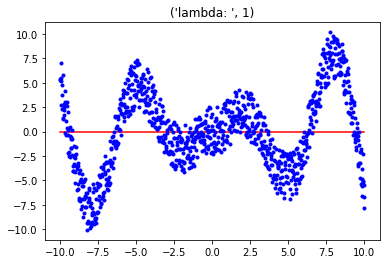

weight:
 [[-2.07420521e-04]
 [ 2.07835362e-01]]
random matrix MSE:  3121.277620687412


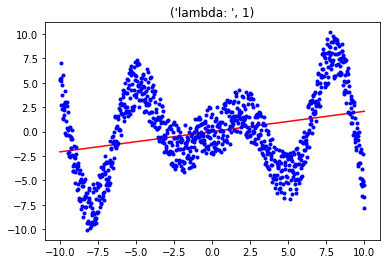

weight:
 [[-0.00914707]
 [ 0.20783562]
 [ 0.00026791]]
random matrix MSE:  3121.2522174113733


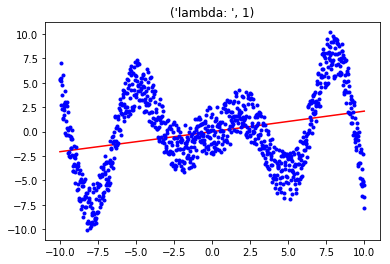

weight:
 [[-0.00850629]
 [-0.08760682]
 [ 0.0002574 ]
 [ 0.00491436]]
random matrix MSE:  3047.669304846758


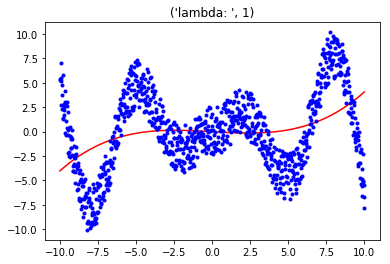

weight:
 [[-5.52537922e-02]
 [-8.75990577e-02]
 [ 4.93060470e-03]
 [ 4.91425488e-03]
 [-5.44298733e-05]]
random matrix MSE:  3048.418213724312


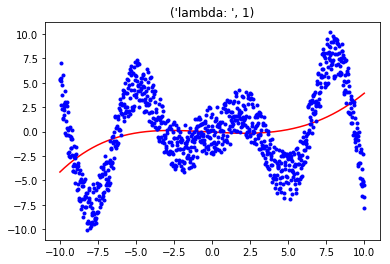

weight:
 [[-5.10208689e-02]
 [-1.41653928e+00]
 [ 4.74106312e-03]
 [ 6.68157332e-02]
 [-5.27565444e-05]
 [-5.56033783e-04]]
random matrix MSE:  2600.2953387098964


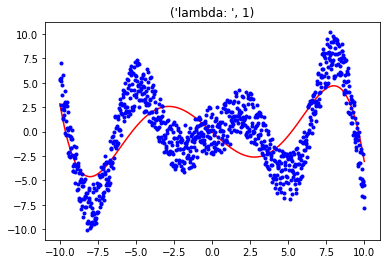

weight:
 [[ 1.22887994e-02]
 [-1.41656709e+00]
 [-8.55540501e-03]
 [ 6.68167256e-02]
 [ 3.45505099e-04]
 [-5.56041534e-04]
 [-2.91527134e-06]]
random matrix MSE:  2600.326698879923


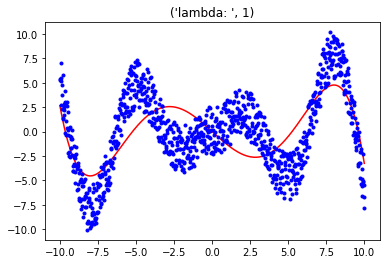

weight:
 [[ 4.85221926e-03]
 [ 4.60738563e-01]
 [-7.93842108e-03]
 [-1.01857219e-01]
 [ 3.32433542e-04]
 [ 3.14790780e-03]
 [-2.83613371e-06]
 [-2.28853689e-05]]
random matrix MSE:  1731.5872829505856


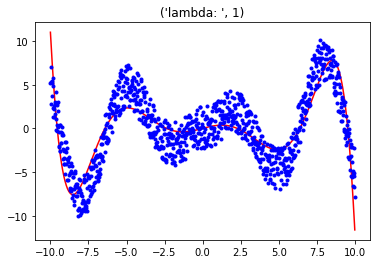

weight:
 [[-4.03829668e-02]
 [ 4.60774459e-01]
 [ 8.34999450e-03]
 [-1.01859552e-01]
 [-5.62022874e-04]
 [ 3.14795074e-03]
 [ 1.26396978e-05]
 [-2.28856058e-05]
 [-8.27496362e-08]]
random matrix MSE:  1732.0274324096492


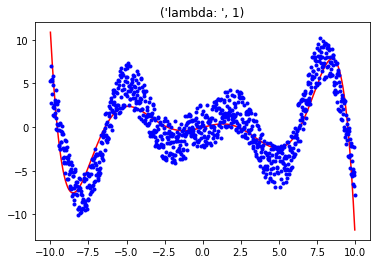

weight:
 [[-4.78037655e-02]
 [ 2.12980881e+00]
 [ 9.29629177e-03]
 [-3.46309259e-01]
 [-5.96560909e-04]
 [ 1.26650020e-02]
 [ 1.31141470e-05]
 [-1.58593427e-04]
 [-8.49321626e-08]
 [ 6.39631766e-07]]
random matrix MSE:  1259.7217469046714


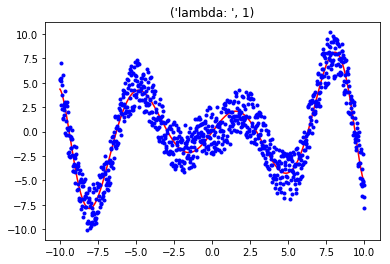

weight:
 [[ 8.62714487e-03]
 [ 2.12974759e+00]
 [-2.17410486e-02]
 [-3.46303038e-01]
 [ 2.08898839e-03]
 [ 1.26648048e-02]
 [-6.73050446e-05]
 [-1.58590967e-04]
 [ 8.89737118e-07]
 [ 6.39621219e-07]
 [-4.10735646e-09]]
random matrix MSE:  1258.7465002220952


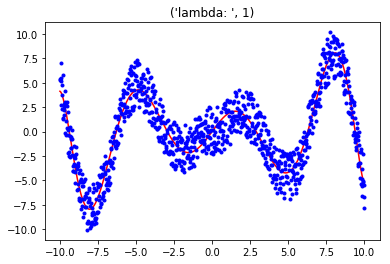

weight:
 [[ 8.90911604e-03]
 [ 2.06871017e+00]
 [-2.17898794e-02]
 [-3.33091972e-01]
 [ 2.09160908e-03]
 [ 1.18733880e-02]
 [-6.73645494e-05]
 [-1.39404452e-04]
 [ 8.90337393e-07]
 [ 4.37466999e-07]
 [-4.10957438e-09]
 [ 7.70418159e-10]]
random matrix MSE:  1256.5269485826304


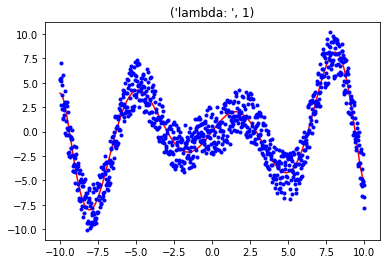

weight:
 [[ 9.66899103e-02]
 [ 2.06861338e+00]
 [-9.02224322e-02]
 [-3.33077928e-01]
 [ 1.06309873e-02]
 [ 1.18727191e-02]
 [-4.53762087e-04]
 [-1.39390517e-04]
 [ 8.74129237e-06]
 [ 4.37335278e-07]
 [-7.72440688e-08]
 [ 7.70880667e-10]
 [ 2.54369299e-10]]
random matrix MSE:  1253.8794186112248


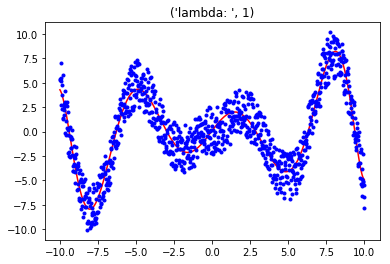

weight:
 [[ 9.93155885e-02]
 [ 1.48415554e+00]
 [-9.07790643e-02]
 [-1.57850878e-01]
 [ 1.06701798e-02]
 [-3.00072117e-03]
 [-4.55020589e-04]
 [ 3.97998769e-04]
 [ 8.76155720e-06]
 [-8.95042813e-06]
 [-7.74034372e-08]
 [ 7.91439104e-08]
 [ 2.54856364e-10]
 [-2.50729800e-10]]
random matrix MSE:  1212.0511777556655


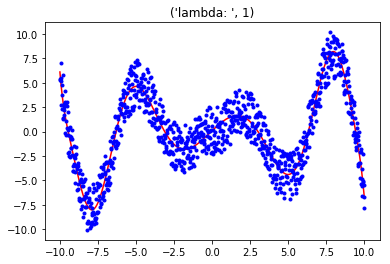

weight:
 [[ 1.08222899e-01]
 [ 1.48415007e+00]
 [-1.00119174e-01]
 [-1.57849812e-01]
 [ 1.22550723e-02]
 [-3.00079158e-03]
 [-5.55206328e-04]
 [ 3.98000921e-04]
 [ 1.17613652e-05]
 [-8.95046144e-06]
 [-1.23311930e-07]
 [ 7.91441640e-08]
 [ 6.01976821e-10]
 [-2.50730555e-10]
 [-1.02792726e-12]]
random matrix MSE:  1212.0816441853628


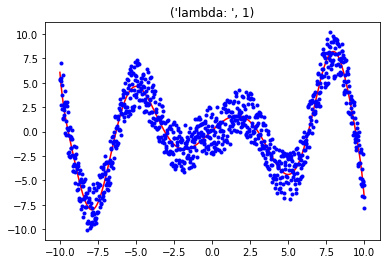

In [150]:
# dimension is N
r = makeSigma(15)
error = []
for n in range(0, 15):
    lambda_ = 1
    err = training(n, lambda_, r)
    error.append(err)

# Visualization of MSE

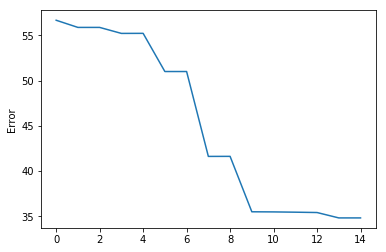

In [151]:
x_axis = np.arange(0, 15, 1)
plt.plot(x_axis, error)
ylab = 'Error'
plt.ylabel(ylab)
plt.show()

# $\lambda = 10^{-2}$

weight:
 [[-4.02830132e-16]]
random matrix MSE:  3210.4180863225865


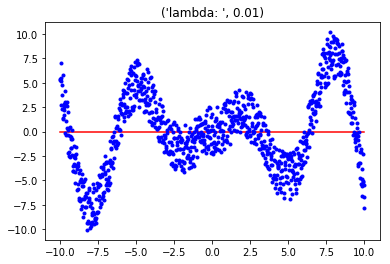

weight:
 [[-2.07633919e-08]
 [ 2.07841572e-01]]
random matrix MSE:  3121.2795466487587


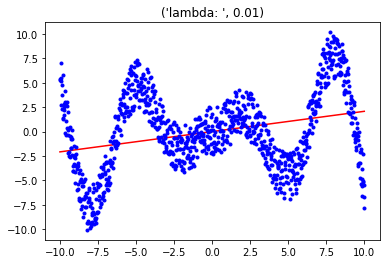

weight:
 [[-0.00870735]
 [ 0.20784157]
 [ 0.0002607 ]]
random matrix MSE:  3121.254749232579


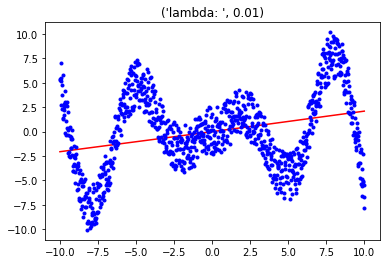

weight:
 [[-0.00870728]
 [-0.08762358]
 [ 0.0002607 ]
 [ 0.0049146 ]]
random matrix MSE:  3047.667565077898


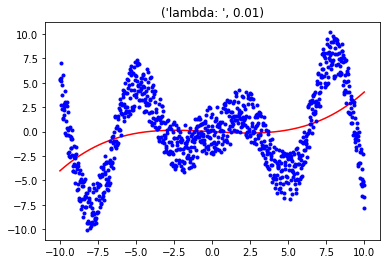

weight:
 [[-5.56995099e-02]
 [-8.76235824e-02]
 [ 4.95056303e-03]
 [ 4.91459661e-03]
 [-5.46060712e-05]]
random matrix MSE:  3048.420137976308


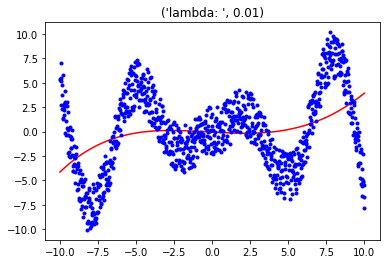

weight:
 [[-5.56990850e-02]
 [-1.41731027e+00]
 [ 4.95054400e-03]
 [ 6.68432398e-02]
 [-5.46059032e-05]
 [-5.56248632e-04]]
random matrix MSE:  2600.2551045236246


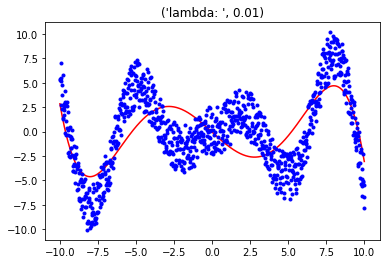

weight:
 [[ 6.41928251e-03]
 [-1.41731028e+00]
 [-8.06843418e-03]
 [ 6.68432399e-02]
 [ 3.35188028e-04]
 [-5.56248632e-04]
 [-2.85280988e-06]]
random matrix MSE:  2600.2820227629013


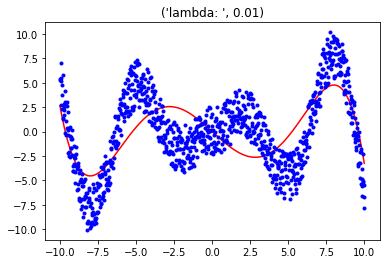

weight:
 [[ 6.41853539e-03]
 [ 4.61171373e-01]
 [-8.06837220e-03]
 [-1.01885356e-01]
 [ 3.35186715e-04]
 [ 3.14842551e-03]
 [-2.85280193e-06]
 [-2.28882260e-05]]
random matrix MSE:  1731.5833568191722


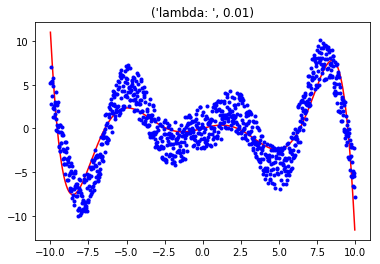

weight:
 [[-3.86704176e-02]
 [ 4.61171376e-01]
 [ 8.13161091e-03]
 [-1.01885356e-01]
 [-5.54052292e-04]
 [ 3.14842552e-03]
 [ 1.25302058e-05]
 [-2.28882260e-05]
 [-8.22459595e-08]]
random matrix MSE:  1732.0190297373683


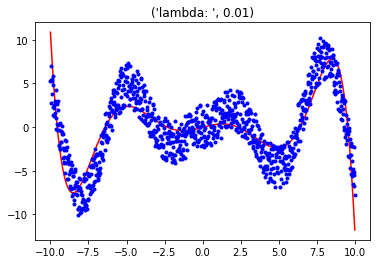

weight:
 [[-3.86711647e-02]
 [ 2.13365730e+00]
 [ 8.13170617e-03]
 [-3.46700368e-01]
 [-5.54055769e-04]
 [ 1.26774010e-02]
 [ 1.25302536e-05]
 [-1.58748081e-04]
 [-8.22461791e-08]
 [ 6.40294781e-07]]
random matrix MSE:  1259.8870604410074


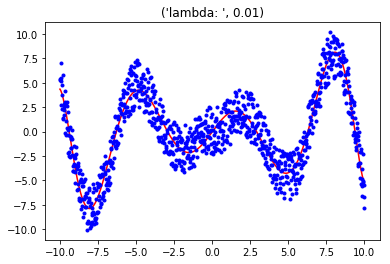

weight:
 [[ 1.90323610e-02]
 [ 2.13365730e+00]
 [-2.35429879e-02]
 [-3.46700367e-01]
 [ 2.18569630e-03]
 [ 1.26774010e-02]
 [-6.95008725e-05]
 [-1.58748080e-04]
 [ 9.11888291e-07]
 [ 6.40294780e-07]
 [-4.18920115e-09]]
random matrix MSE:  1258.9170547892381


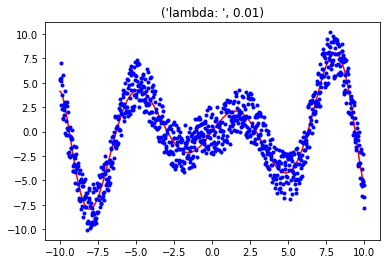

weight:
 [[ 1.90323883e-02]
 [ 2.07483784e+00]
 [-2.35429927e-02]
 [-3.33981064e-01]
 [ 2.18569656e-03]
 [ 1.19157356e-02]
 [-6.95008783e-05]
 [-1.40286701e-04]
 [ 9.11888350e-07]
 [ 4.45806377e-07]
 [-4.18920137e-09]
 [ 7.41136499e-10]]
random matrix MSE:  1256.7570845130447


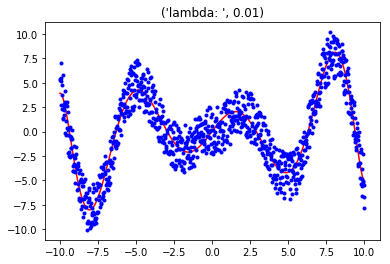

weight:
 [[ 1.07677742e-01]
 [ 2.07483783e+00]
 [-9.25518111e-02]
 [-3.33981062e-01]
 [ 1.07949995e-02]
 [ 1.19157355e-02]
 [-4.59028662e-04]
 [-1.40286700e-04]
 [ 8.82609677e-06]
 [ 4.45806364e-07]
 [-7.79109962e-08]
 [ 7.41136542e-10]
 [ 2.56407581e-10]]
random matrix MSE:  1254.0877007439408


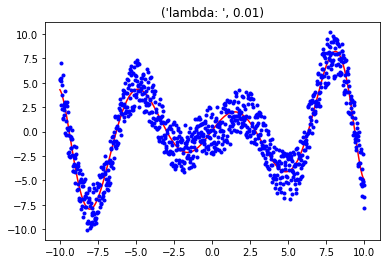

weight:
 [[ 1.07678002e-01]
 [ 1.49114634e+00]
 [-9.25518644e-02]
 [-1.59212993e-01]
 [ 1.07950031e-02]
 [-2.91073843e-03]
 [-4.59028775e-04]
 [ 3.95249031e-04]
 [ 8.82609854e-06]
 [-8.90786686e-06]
 [-7.79110097e-08]
 [ 7.88198138e-08]
 [ 2.56407622e-10]
 [-2.49765463e-10]]
random matrix MSE:  1212.1669295496877


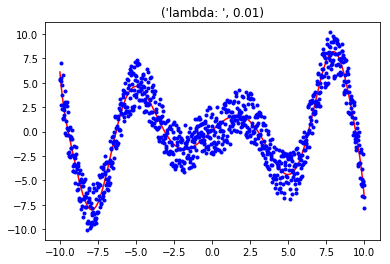

weight:
 [[ 1.16794962e-01]
 [ 1.49114634e+00]
 [-1.02106221e-01]
 [-1.59212992e-01]
 [ 1.24161097e-02]
 [-2.91073844e-03]
 [-5.61500611e-04]
 [ 3.95249032e-04]
 [ 1.18943136e-05]
 [-8.90786686e-06]
 [-1.24866006e-07]
 [ 7.88198139e-08]
 [ 6.11439006e-10]
 [-2.49765463e-10]
 [-1.05135020e-12]]
random matrix MSE:  1212.1895503951578


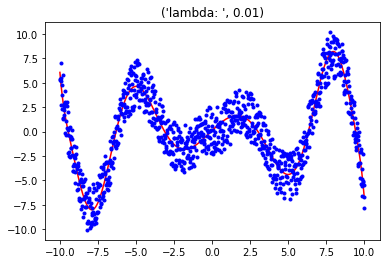

In [152]:
# dimension is N
error = []
for n in range(0, 15):
    lambda_ = 10**(-2)
    err = training(n, lambda_, r)
    error.append(err)

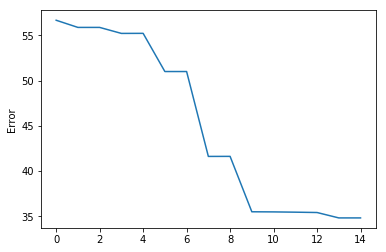

In [153]:
x_axis = np.arange(0, 15, 1)
plt.plot(x_axis, error)
ylab = 'Error'
plt.ylabel(ylab)
plt.show()

# $\lambda = 10^{-4}$

weight:
 [[-4.02830172e-16]]
random matrix MSE:  3210.4180863225865


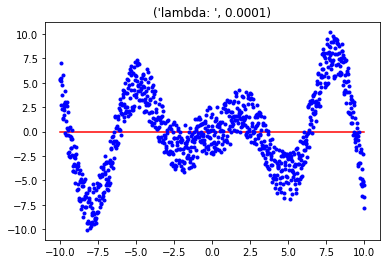

weight:
 [[-2.07652542e-12]
 [ 2.07841573e-01]]
random matrix MSE:  3121.2795468415534


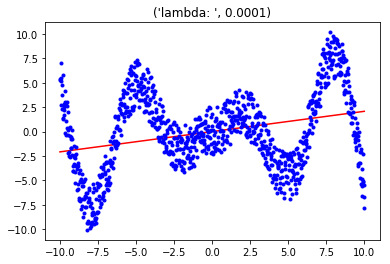

weight:
 [[-0.0087073 ]
 [ 0.20784157]
 [ 0.0002607 ]]
random matrix MSE:  3121.2547494863225


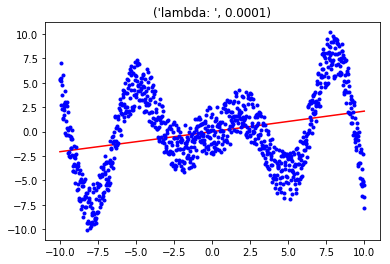

weight:
 [[-0.0087073 ]
 [-0.08762358]
 [ 0.0002607 ]
 [ 0.0049146 ]]
random matrix MSE:  3047.6675649035124


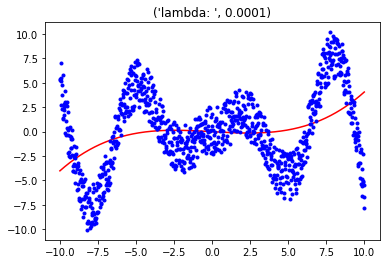

weight:
 [[-5.56995546e-02]
 [-8.76235848e-02]
 [ 4.95056503e-03]
 [ 4.91459665e-03]
 [-5.46060889e-05]]
random matrix MSE:  3048.4201381693774


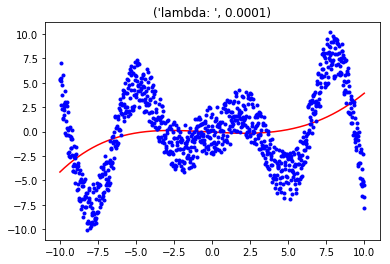

weight:
 [[-5.56995546e-02]
 [-1.41731035e+00]
 [ 4.95056503e-03]
 [ 6.68432425e-02]
 [-5.46060888e-05]
 [-5.56248653e-04]]
random matrix MSE:  2600.255100485184


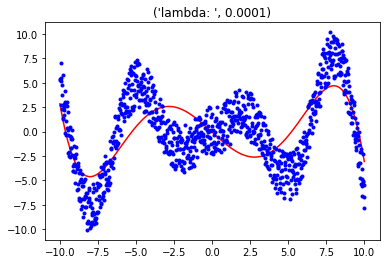

weight:
 [[ 6.41869289e-03]
 [-1.41731035e+00]
 [-8.06838527e-03]
 [ 6.68432425e-02]
 [ 3.35186992e-04]
 [-5.56248653e-04]
 [-2.85280361e-06]]
random matrix MSE:  2600.2820182750047


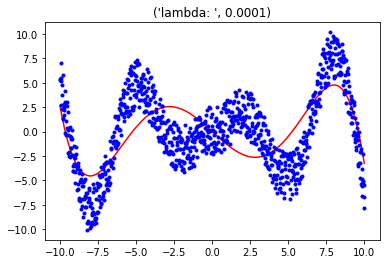

weight:
 [[ 6.41869282e-03]
 [ 4.61171416e-01]
 [-8.06838526e-03]
 [-1.01885359e-01]
 [ 3.35186991e-04]
 [ 3.14842557e-03]
 [-2.85280361e-06]
 [-2.28882263e-05]]
random matrix MSE:  1731.5833564493548


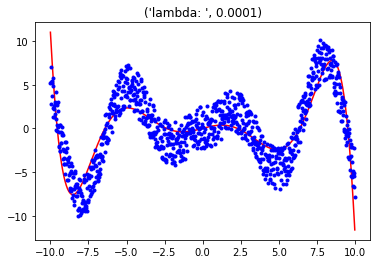

weight:
 [[-3.86702454e-02]
 [ 4.61171416e-01]
 [ 8.13158895e-03]
 [-1.01885359e-01]
 [-5.54051491e-04]
 [ 3.14842557e-03]
 [ 1.25301948e-05]
 [-2.28882263e-05]
 [-8.22459088e-08]]
random matrix MSE:  1732.019028892285


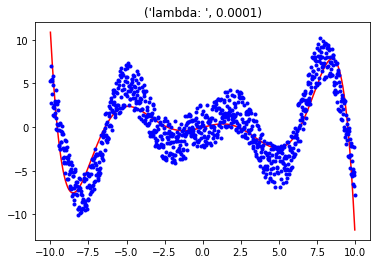

weight:
 [[-3.86702454e-02]
 [ 2.13365769e+00]
 [ 8.13158895e-03]
 [-3.46700407e-01]
 [-5.54051491e-04]
 [ 1.26774023e-02]
 [ 1.25301948e-05]
 [-1.58748096e-04]
 [-8.22459088e-08]
 [ 6.40294847e-07]]
random matrix MSE:  1259.8870773670878


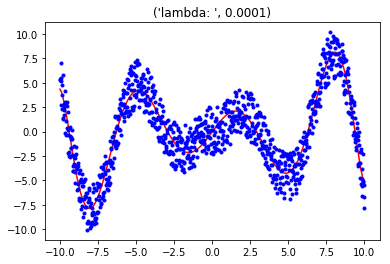

weight:
 [[ 1.90334086e-02]
 [ 2.13365769e+00]
 [-2.35431693e-02]
 [-3.46700407e-01]
 [ 2.18570604e-03]
 [ 1.26774023e-02]
 [-6.95010936e-05]
 [-1.58748096e-04]
 [ 9.11890522e-07]
 [ 6.40294847e-07]
 [-4.18920939e-09]]
random matrix MSE:  1258.917071961703


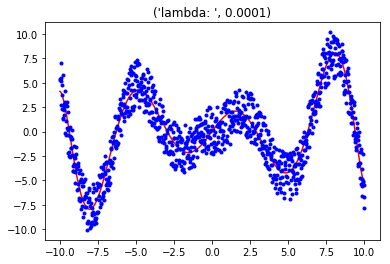

weight:
 [[ 1.90334087e-02]
 [ 2.07483846e+00]
 [-2.35431694e-02]
 [-3.33981153e-01]
 [ 2.18570604e-03]
 [ 1.19157399e-02]
 [-6.95010936e-05]
 [-1.40286790e-04]
 [ 9.11890522e-07]
 [ 4.45807217e-07]
 [-4.18920939e-09]
 [ 7.41133547e-10]]
random matrix MSE:  1256.7571077159125


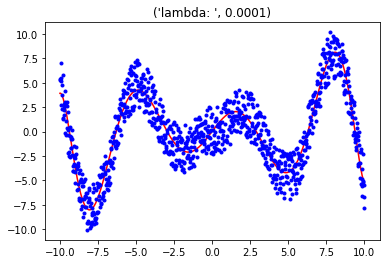

weight:
 [[ 1.07678849e-01]
 [ 2.07483846e+00]
 [-9.25520459e-02]
 [-3.33981153e-01]
 [ 1.07950160e-02]
 [ 1.19157399e-02]
 [-4.59029193e-04]
 [-1.40286790e-04]
 [ 8.82610532e-06]
 [ 4.45807218e-07]
 [-7.79110634e-08]
 [ 7.41133544e-10]
 [ 2.56407787e-10]]
random matrix MSE:  1254.0877219463546


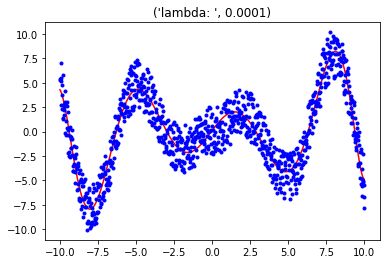

weight:
 [[ 1.07678846e-01]
 [ 1.49114705e+00]
 [-9.25520433e-02]
 [-1.59213130e-01]
 [ 1.07950157e-02]
 [-2.91072936e-03]
 [-4.59029180e-04]
 [ 3.95248754e-04]
 [ 8.82610505e-06]
 [-8.90786257e-06]
 [-7.79110610e-08]
 [ 7.88197812e-08]
 [ 2.56407778e-10]
 [-2.49765366e-10]]
random matrix MSE:  1212.1669411856012


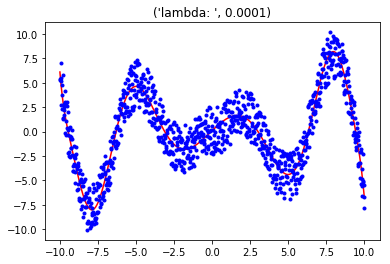

weight:
 [[ 1.16795837e-01]
 [ 1.49114705e+00]
 [-1.02106422e-01]
 [-1.59213130e-01]
 [ 1.24161259e-02]
 [-2.91072936e-03]
 [-5.61501246e-04]
 [ 3.95248754e-04]
 [ 1.18943270e-05]
 [-8.90786257e-06]
 [-1.24866163e-07]
 [ 7.88197812e-08]
 [ 6.11439959e-10]
 [-2.49765366e-10]
 [-1.05135256e-12]]
random matrix MSE:  1212.189562845593


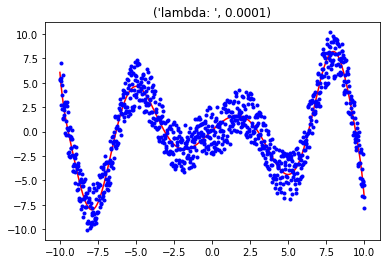

In [154]:
# dimension is N
error = []
for n in range(0, 15):
    lambda_ = 10**(-4)
    err = training(n, lambda_, r)
    error.append(err)

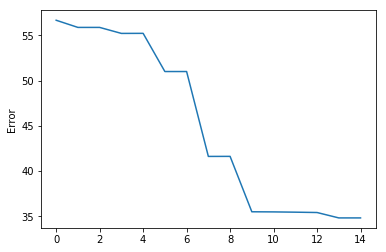

In [155]:
x_axis = np.arange(0, 15, 1)
plt.plot(x_axis, error)
ylab = 'Error'
plt.ylabel(ylab)
plt.show()

# $\lambda = 10^{-6}$

weight:
 [[-4.02830172e-16]]
random matrix MSE:  3210.4180863225865


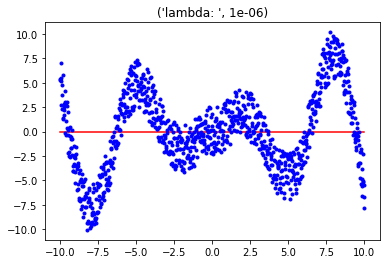

weight:
 [[-3.96836215e-16]
 [ 2.07841573e-01]]
random matrix MSE:  3121.279546841573


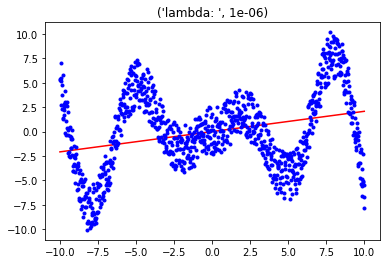

weight:
 [[-0.0087073 ]
 [ 0.20784157]
 [ 0.0002607 ]]
random matrix MSE:  3121.254749486352


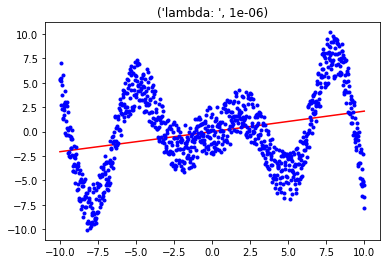

weight:
 [[-0.0087073 ]
 [-0.08762358]
 [ 0.0002607 ]
 [ 0.0049146 ]]
random matrix MSE:  3047.6675649034883


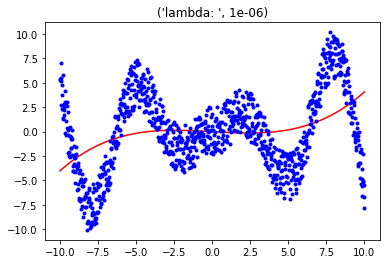

weight:
 [[-5.56995546e-02]
 [-8.76235848e-02]
 [ 4.95056503e-03]
 [ 4.91459665e-03]
 [-5.46060889e-05]]
random matrix MSE:  3048.4201381694015


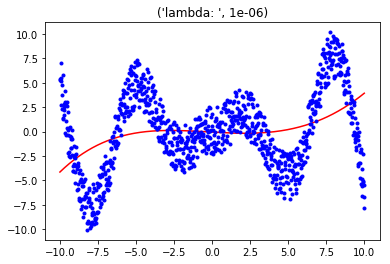

weight:
 [[-5.56995546e-02]
 [-1.41731035e+00]
 [ 4.95056503e-03]
 [ 6.68432425e-02]
 [-5.46060889e-05]
 [-5.56248653e-04]]
random matrix MSE:  2600.255100484778


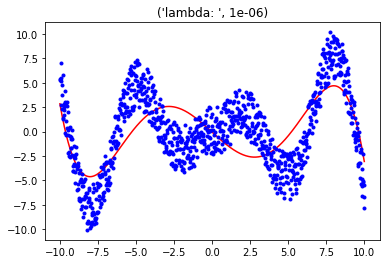

weight:
 [[ 6.41869284e-03]
 [-1.41731035e+00]
 [-8.06838526e-03]
 [ 6.68432425e-02]
 [ 3.35186991e-04]
 [-5.56248653e-04]
 [-2.85280361e-06]]
random matrix MSE:  2600.282018274557


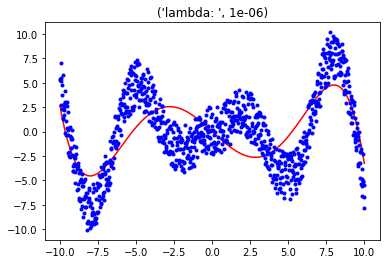

weight:
 [[ 6.41869284e-03]
 [ 4.61171416e-01]
 [-8.06838526e-03]
 [-1.01885359e-01]
 [ 3.35186992e-04]
 [ 3.14842557e-03]
 [-2.85280361e-06]
 [-2.28882263e-05]]
random matrix MSE:  1731.583356449307


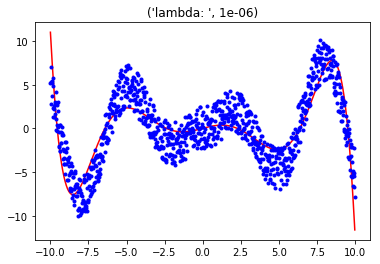

weight:
 [[-3.86702454e-02]
 [ 4.61171416e-01]
 [ 8.13158894e-03]
 [-1.01885359e-01]
 [-5.54051491e-04]
 [ 3.14842557e-03]
 [ 1.25301948e-05]
 [-2.28882263e-05]
 [-8.22459088e-08]]
random matrix MSE:  1732.0190288922015


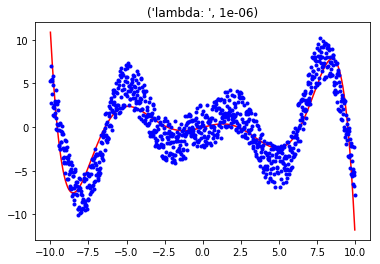

weight:
 [[-3.86702453e-02]
 [ 2.13365769e+00]
 [ 8.13158894e-03]
 [-3.46700407e-01]
 [-5.54051490e-04]
 [ 1.26774023e-02]
 [ 1.25301948e-05]
 [-1.58748096e-04]
 [-8.22459088e-08]
 [ 6.40294847e-07]]
random matrix MSE:  1259.8870773686929


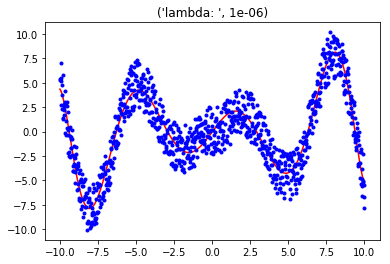

weight:
 [[ 1.90334087e-02]
 [ 2.13365769e+00]
 [-2.35431694e-02]
 [-3.46700407e-01]
 [ 2.18570604e-03]
 [ 1.26774023e-02]
 [-6.95010936e-05]
 [-1.58748096e-04]
 [ 9.11890522e-07]
 [ 6.40294847e-07]
 [-4.18920939e-09]]
random matrix MSE:  1258.9170719634787


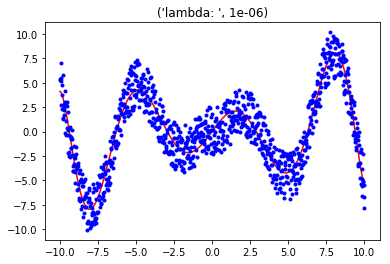

weight:
 [[ 1.90334088e-02]
 [ 2.07483846e+00]
 [-2.35431694e-02]
 [-3.33981153e-01]
 [ 2.18570604e-03]
 [ 1.19157399e-02]
 [-6.95010936e-05]
 [-1.40286790e-04]
 [ 9.11890522e-07]
 [ 4.45807217e-07]
 [-4.18920940e-09]
 [ 7.41133547e-10]]
random matrix MSE:  1256.7571077173363


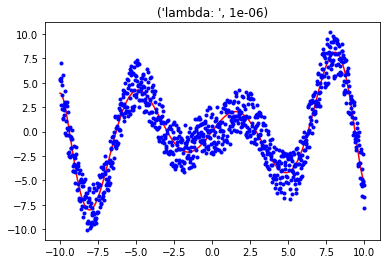

weight:
 [[ 1.07678849e-01]
 [ 2.07483846e+00]
 [-9.25520459e-02]
 [-3.33981153e-01]
 [ 1.07950160e-02]
 [ 1.19157399e-02]
 [-4.59029193e-04]
 [-1.40286790e-04]
 [ 8.82610532e-06]
 [ 4.45807218e-07]
 [-7.79110634e-08]
 [ 7.41133543e-10]
 [ 2.56407787e-10]]
random matrix MSE:  1254.0877219527258


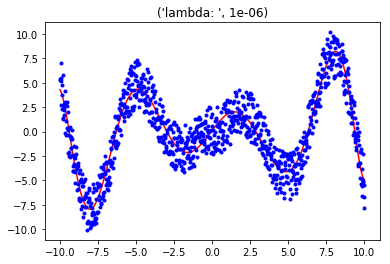

weight:
 [[ 1.07678846e-01]
 [ 1.49114705e+00]
 [-9.25520433e-02]
 [-1.59213130e-01]
 [ 1.07950157e-02]
 [-2.91072936e-03]
 [-4.59029179e-04]
 [ 3.95248754e-04]
 [ 8.82610505e-06]
 [-8.90786257e-06]
 [-7.79110610e-08]
 [ 7.88197811e-08]
 [ 2.56407778e-10]
 [-2.49765366e-10]]
random matrix MSE:  1212.166941193715


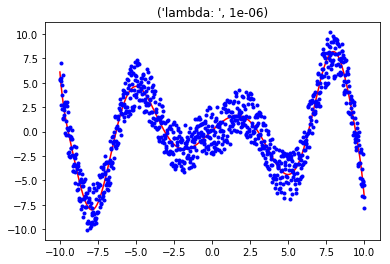

weight:
 [[ 1.16795827e-01]
 [ 1.49114705e+00]
 [-1.02106422e-01]
 [-1.59213130e-01]
 [ 1.24161259e-02]
 [-2.91072936e-03]
 [-5.61501246e-04]
 [ 3.95248754e-04]
 [ 1.18943270e-05]
 [-8.90786257e-06]
 [-1.24866163e-07]
 [ 7.88197811e-08]
 [ 6.11439959e-10]
 [-2.49765366e-10]
 [-1.05135256e-12]]
random matrix MSE:  1212.189562709371


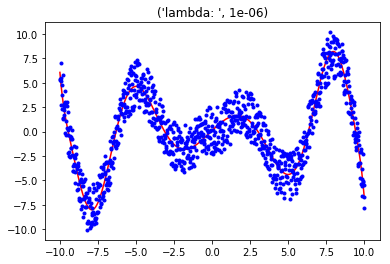

In [156]:
# dimension is N
error = []
for n in range(0, 15):
    lambda_ = 10**(-6)
    err = training(n, lambda_, r)
    error.append(err)

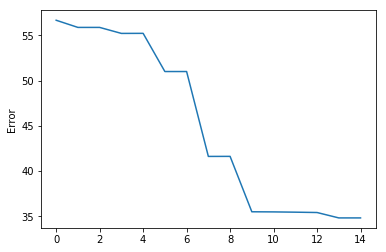

In [157]:
x_axis = np.arange(0, 15, 1)
plt.plot(x_axis, error)
ylab = 'Error'
plt.ylabel(ylab)
plt.show()

# $\lambda = 5$

weight:
 [[-3.93014622e-16]]
random matrix MSE:  3210.4180863225865


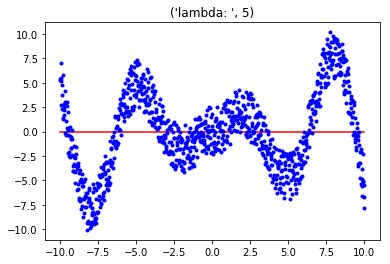

weight:
 [[-0.00506067]
 [ 0.20769006]]
random matrix MSE:  3121.2325522725473


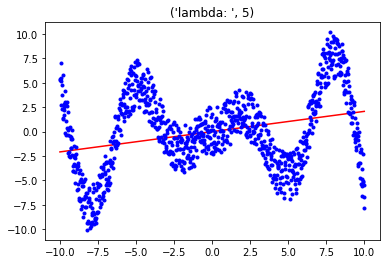

weight:
 [[-0.0191503 ]
 [ 0.20770026]
 [ 0.00043205]]
random matrix MSE:  3121.2010484806483


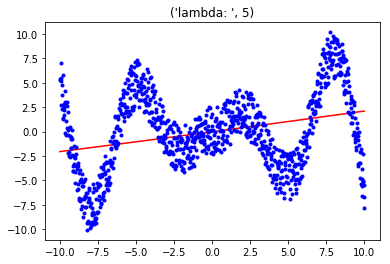

weight:
 [[-0.00395029]
 [-0.08722689]
 [ 0.00018264]
 [ 0.00490907]]
random matrix MSE:  3047.7087408435345


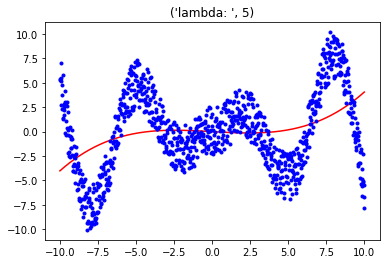

weight:
 [[-4.53897685e-02]
 [-8.70563103e-02]
 [ 4.48891403e-03]
 [ 4.90669203e-03]
 [-5.05304982e-05]]
random matrix MSE:  3048.3885594865487


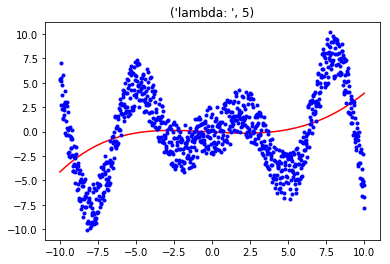

weight:
 [[ 5.16806539e-02]
 [-1.39961351e+00]
 [ 1.42300393e-04]
 [ 6.62118786e-02]
 [-1.21573157e-05]
 [-5.51317177e-04]]
random matrix MSE:  2601.640266711646


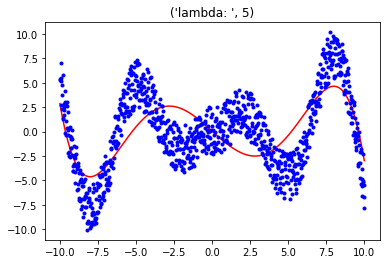

weight:
 [[ 1.38814447e-01]
 [-1.40054676e+00]
 [-1.90527425e-02]
 [ 6.62451739e-02]
 [ 5.67904006e-04]
 [-5.51577241e-04]
 [-4.26171544e-06]]
random matrix MSE:  2601.675363240115


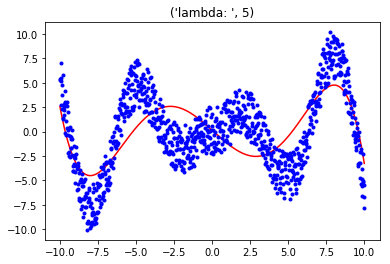

weight:
 [[-2.84664918e-02]
 [ 4.51531829e-01]
 [-5.17409813e-03]
 [-1.01258677e-01]
 [ 2.73867986e-04]
 [ 3.13689502e-03]
 [-2.48156701e-06]
 [-2.28245928e-05]]
random matrix MSE:  1731.7757397885118


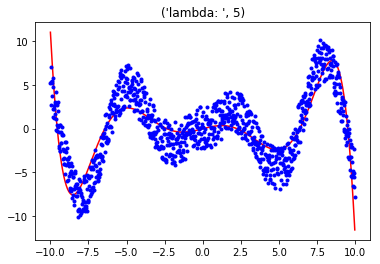

weight:
 [[-7.63711776e-02]
 [ 4.52433481e-01]
 [ 1.29391967e-02]
 [-1.01317294e-01]
 [-7.29519949e-04]
 [ 3.13797355e-03]
 [ 1.49406065e-05]
 [-2.28305449e-05]
 [-9.33341063e-08]]
random matrix MSE:  1732.2245737420385


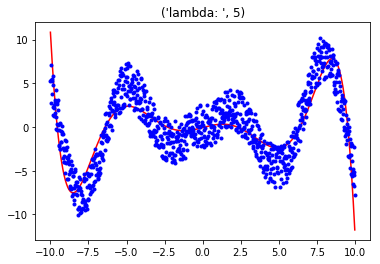

weight:
 [[-2.36226599e-01]
 [ 2.05040713e+00]
 [ 3.33238960e-02]
 [-3.38239943e-01]
 [-1.47352235e-03]
 [ 1.24091877e-02]
 [ 2.51609736e-05]
 [-1.55402637e-04]
 [-1.40349084e-07]
 [ 6.25952516e-07]]
random matrix MSE:  1259.5302590618057


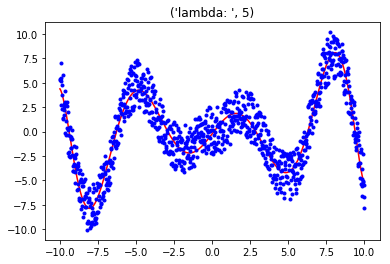

weight:
 [[-2.04613074e-01]
 [ 2.04962372e+00]
 [ 1.51871550e-02]
 [-3.38160328e-01]
 [ 1.07096215e-04]
 [ 1.24066637e-02]
 [-2.23046518e-05]
 [-1.55371156e-04]
 [ 4.35780077e-07]
 [ 6.25817551e-07]
 [-2.43006506e-09]]
random matrix MSE:  1258.6526495552687


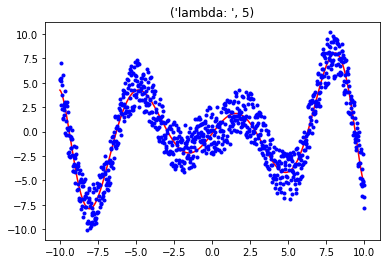

weight:
 [[-1.93937902e-01]
 [ 1.94592577e+00]
 [ 1.33384656e-02]
 [-3.15276617e-01]
 [ 2.06313144e-04]
 [ 1.10248394e-02]
 [-2.45574488e-05]
 [-1.21726216e-04]
 [ 4.58505946e-07]
 [ 2.70365108e-07]
 [-2.51403315e-09]
 [ 1.35715510e-09]]
random matrix MSE:  1255.3918097066462


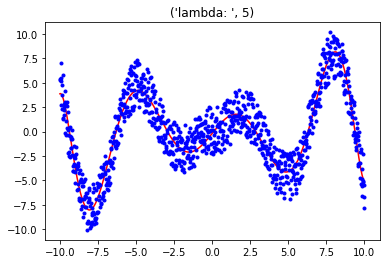

weight:
 [[-1.22905311e-01]
 [ 1.94421582e+00]
 [-4.36690727e-02]
 [-3.15028513e-01]
 [ 7.35315443e-03]
 [ 1.10130222e-02]
 [-3.48507952e-04]
 [-1.21480022e-04]
 [ 7.04645007e-06]
 [ 2.68037978e-07]
 [-6.39153175e-08]
 [ 1.36532624e-09]
 [ 2.13633597e-10]]
random matrix MSE:  1252.7682420227566


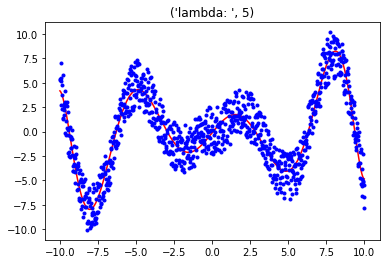

weight:
 [[-6.36795643e-02]
 [ 1.34789499e+00]
 [-5.62247059e-02]
 [-1.31301356e-01]
 [ 8.23719936e-03]
 [-4.75461013e-03]
 [-3.76895419e-04]
 [ 4.51594995e-04]
 [ 7.50355585e-06]
 [-9.78000665e-06]
 [-6.75101349e-08]
 [ 8.54610039e-08]
 [ 2.24620177e-10]
 [-2.69526072e-10]]
random matrix MSE:  1212.8802439224212


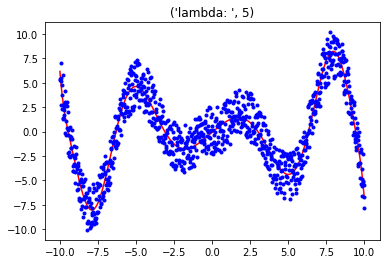

weight:
 [[-5.87978324e-02]
 [ 1.34783267e+00]
 [-6.14029523e-02]
 [-1.31289213e-01]
 [ 9.11737133e-03]
 [-4.75541232e-03]
 [-4.32566613e-04]
 [ 4.51619509e-04]
 [ 9.17095908e-06]
 [-9.78038608e-06]
 [-9.30318293e-08]
 [ 8.54638932e-08]
 [ 4.17612624e-10]
 [-2.69534669e-10]
 [-5.71547181e-13]]
random matrix MSE:  1212.8895364275213


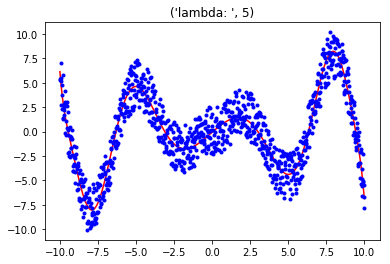

In [158]:
# dimension is N
error = []
for n in range(0, 15):
    lambda_ = 5
    err = training(n, lambda_, r)
    error.append(err)

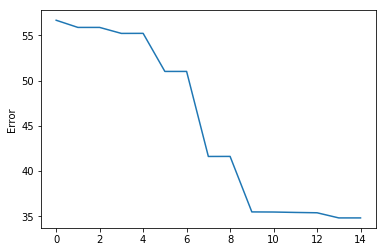

In [159]:
x_axis = np.arange(0, 15, 1)
plt.plot(x_axis, error)
ylab = 'Error'
plt.ylabel(ylab)
plt.show()